# Analisa Sentimen Dari Media Sosial Twitter Tentang Agresivitas Kepada Para Pejabat Indonesia Di Tahun 2018

## 1. Import Library & Load Dataset Dari Local Device

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data_2018 = pd.read_excel("Data Tahun 2018.xlsx")
data_2018.head()

,date,content,label
0,2018-12-27 13:00:39+00:00,@haikal_hassan @aniesbaswedan Ini bentuk perta...,positif
1,2018-12-25 10:01:05+00:00,@yunartowijaya @prabowo Itu haikal ngerti apa ...,positif
2,2018-12-23 07:02:38+00:00,@ariantobulolo @salima252 @aniesbaswedan @Nona...,negatif
3,2018-12-22 08:50:26+00:00,@heykamuuuh kalem min.. yg bego mah admin suar...,negatif
4,2018-12-21 15:32:31+00:00,@agvysuhaimi @rullyjoo27 @harypriyono88 @herri...,positif


In [3]:
# Mengecek tipe data dan juga apakah di dalam DataFrame "data_2018" memiliki nilai NaN/tidak
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1798 non-null   object
 1   content  1798 non-null   object
 2   label    1798 non-null   object
dtypes: object(3)
memory usage: 42.3+ KB


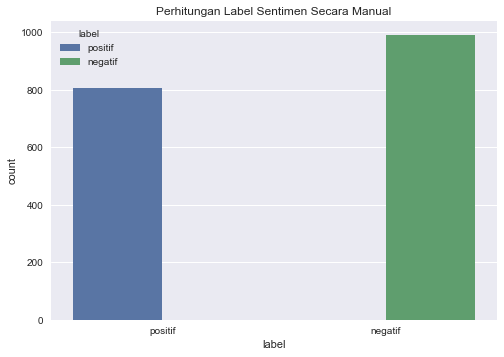

<Figure size 720x720 with 0 Axes>

In [4]:
# Melakukan visualisasi untuk kolom "label"

plt.style.use("seaborn")
plt.title("Perhitungan Label Sentimen Secara Manual")
sns.countplot(x="label", hue="label", data=data_2018)
plt.figure(figsize=(10, 10))
plt.show()

In [5]:
# Menghitung sekaligus mengurutkan jumlah label terbanyak berdasarkan tweet
jumlah_content = data_2018.groupby("label").count()["content"].reset_index().sort_values(by="content", ascending=False)
jumlah_content.style.background_gradient(cmap="spring")

,label,content
0,negatif,991
1,positif,807


Dapat dilihat dari perhitungan diatas, dari 1798 jumlah data netizen twitter di tahun 2018 ketika melakukan tweet tentang topik para pejabat di Indonesia mendapatkan label positif yang sangat tinggi daripada label negatif yang memiliki jumlah sentimen sebanyak 991 tweet sedangkan label negatif memiliki jumlah sentimen sebanyak 807. Bisa dikatakan jumlah label sentimen memiliki nilai yang cukup balanced (seimbang).

## 2. Text Preprocessing (Cleansing, Case Folding, Tokenizing, Stopwords & Stemming)

### Cleansing Teks

In [6]:
# Menghilangkan dari kalimat-kalimat, simbol-simbol, emoticon yang tidak dibutuhkan selama pengujian pada kolom content
def bersih_text(text):
    text = re.sub(r'[^a-zA-z0-9]',' ', str(text))
    text = re.sub(r'\b\w{1,2}\b','', text)
    text = re.sub(r'\s\s+',' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    return text

data_2018["content"] = data_2018["content"].apply(bersih_text)

data_2018.head()

,date,content,label
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan Ini bentuk pertan...,positif
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo Itu haikal ngerti apa b...,positif
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan NonaYen...,negatif
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif


In [7]:
# Menghapus spasi pada kolom "label"
data_2018.label = list(map(lambda x: x.strip(), data_2018.label))
data_2018.head()

,date,content,label
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan Ini bentuk pertan...,positif
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo Itu haikal ngerti apa b...,positif
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan NonaYen...,negatif
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif


Setelah melakukan proses cleansing teks yaitu menghapus beberapa simbol/karakter-karakter yang tidak dipentingkan dalam kolom content tweet, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil.

### Case Folding

In [8]:
# Mengubah ukuran setiap kalimat yang ada di kolom "content" menjadi huruf kecil
data_2018["content"] = data_2018["content"].str.lower()

data_2018.head()

,date,content,label
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan ini bentuk pertan...,positif
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo itu haikal ngerti apa b...,positif
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan nonayen...,negatif
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata.

### Tokenizing

In [9]:
# Melakukan Tahapan Tokenisasi. 
# Tokenisasi adalah tahapan prepocessing data yang digunakan untuk membagi kalimat menjadi perkata
def tokennization(text):
    return word_tokenize(text)

data_2018["content_tokenizing"] = data_2018["content"].apply(tokennization)
data_2018.head()

,date,content,label,content_tokenizing
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan ini bentuk pertan...,positif,"[haikal, hassan, aniesbaswedan, ini, bentuk, p..."
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo itu haikal ngerti apa b...,positif,"[yunartowijaya, prabowo, itu, haikal, ngerti, ..."
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan nonayen...,negatif,"[ariantobulolo, salima252, aniesbaswedan, nona..."
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif,"[heykamuuuh, kalem, min, bego, mah, admin, sua..."
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif,"[agvysuhaimi, rullyjoo27, harypriyono88, herri..."


Setelah melakukan tahapan tokenisasi, selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan mengambil kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

### Stopwords

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Proses stopwords saya lakukan dengan mengambil nilai-nilai yang ada diatas yang sudah ditentukan oleh library Sastrawi. Kata-kata diatas boleh digunakan secara keseluruhan/diambil hanya beberapa saja.

In [11]:
# Proses Filtering dari kolom "Tweet_Tokenizing"
nltk.download("stopwords")
from nltk.corpus import stopwords

list_delete = ["yang", "untuk", "pada", "ke", "antara", "dua", "ia", "seperti", "antara", "dia", "seperti", "jika",
               "tidak", "oleh", "saat", "harus", "sementara", "mereka", "sudah", "terhadap", "sehingga",
               "secara", "agar", "lain", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada",
               "sekitar", "serta", "di", "dari", "telah", "sebagai", "masih", 'setidaknya', "sesuatu", "pasti", 
               "saja", "toh", "ya", "walau", "hal", "bahwa", "atau", "hanya", "ada", "mereka", "agar", "lain", 
               "anda", "begitu", "yaitu", "yakni", "itulah", "demi", "dimana", "pula", "sambil", "sebelum", 
               "sesudah", "guna", "ia", "dengan", "https", "supaya", "kah", "pun", "sampai", "seraya", "seterusnya", 
               "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "nggak", "mari", "nanti", "melainkan", "oh", "ok",
               "sedangkan", "selagi", "seharusnya", "sebetulnya", "setiap", "apakah", "kecuali", "sebab", "selain"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Mendeklarasikan fungsi untuk list_stopwords
def stopword(text):
    return [word for word in text if word not in list_stopwords]

data_2018["content_stopwords"] = data_2018["content_tokenizing"].apply(stopword)

In [13]:
# Mendeklarasikan fungsi untuk list_delete
def stopwords_removal(text):
    return [word for word in text if word not in list_delete]

data_2018["content_stopwords"] = data_2018["content_stopwords"].apply(stopwords_removal)
data_2018.head()

,date,content,label,content_tokenizing,content_stopwords
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan ini bentuk pertan...,positif,"[haikal, hassan, aniesbaswedan, ini, bentuk, p...","[haikal, hassan, aniesbaswedan, bentuk, bego, ..."
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo itu haikal ngerti apa b...,positif,"[yunartowijaya, prabowo, itu, haikal, ngerti, ...","[yunartowijaya, prabowo, haikal, ngerti, bego,..."
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan nonayen...,negatif,"[ariantobulolo, salima252, aniesbaswedan, nona...","[ariantobulolo, salima252, aniesbaswedan, nona..."
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif,"[heykamuuuh, kalem, min, bego, mah, admin, sua...","[heykamuuuh, kalem, min, bego, mah, admin, sua..."
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif,"[agvysuhaimi, rullyjoo27, harypriyono88, herri...","[agvysuhaimi, rullyjoo27, harypriyono88, herri..."


Tahapan terakhir dalam text processing adalah proses stemming. Teknik Stemming merupakan sebuah tahapan kegiatan text preprocessing untuk memperkecil jumlah indeks yang berbeda dari suatu data dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### Stemming

In [14]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter # Swifter berfungsi untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "content_normalization"
for document in data_2018["content_stopwords"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_word(document):
    return [term_dict[text] for text in document]

data_2018["content_stemming"] = data_2018["content_stopwords"].swifter.apply(stemming_word)

8335
------------------------
haikal : haikal
hassan : hassan
aniesbaswedan : aniesbaswedan
bentuk : bentuk
bego : bego
alias : alias
dungu : dungu
uda : uda
jelas2 : jelas2
mendagri : mendagri
surati : surati
gubernur : gubernur
anies : anies
utk : utk
mempercepat : cepat
wakilnya : wakil
skrg : skrg
tinggal : tinggal
pks : pks
gerindra : gerindra
sdh : sdh
ikhlas : ikhlas
negara : negara
disalahkan : salah
beh : beh
yunartowijaya : yunartowijaya
prabowo : prabowo
ngerti : ngerti
sih : sih
bikin : bikin
wakil : wakil
rebutan : rebut
woy : woy
fitnah : fitnah
mulu : mulu
mulut : mulut
ariantobulolo : ariantobulolo
salima252 : salima252
nonayenaje : nonayenaje
belagak : bagak
nih : nih
orang : orang
haha : haha
pas : pas
jaenudin : jaenudin
naciro : naciro
msh : msh
gub : gub
dki : dki
bus : bus
gandeng : gandeng
pake : pake
buatan : buat
china : china
zhongtong : zhongtong
jamannya : jaman
transjakarta : transjakarta
swedia : swedia
volvo : volvo
pabrikan : pabrikan
produk : produk
oto

alkatirioemar : alkatirioemar
galang : galang
1m : 1m
fsilolongan : fsilolongan
nulis : nulis
salah : salah
kompascom : kompascom
intinya : inti
buang : buang
sampah : sampah
wilayah : wilayah
gratis : gratis
tiss : tiss
tissss : tissss
elang : elang
sutajaya1 : sutajaya1
erickcoon79 : erickcoon79
kangngabei : kangngabei
purwa : purwa
heri : heri
sifugre : sifugre
pph : pph
bekasi : bekas
pendapatan : dapat
point : point
pungut : pungut
retribusi : retribusi
hrsnya : hrsnya
roy766hi2 : roy766hi2
terealisir : terealisir
mati : mati
kagak : kagak
nalar : nalar
permanen : permanen
uncurable : uncurable
metro : metro
tv : tv
ditnya : ditnya
nanya : nanya
indosat : indosat
bodo : bodo
benci : benci
urusanmu : urus
jnglah : jnglah
tuhan : tuhan
ciptakan : cipta
dipake : dipake
males : males
tau : tau
ngah : ngah
ngoh : ngoh
paham : paham
diapain : diapain
ngakak : ngakak
ruang : ruang
makan : makan
ibu2 : ibu2
abis : abis
meeting : meeting
balaikota : balaikota
panas : panas
naek : naek
taxi

detektifupin : detektifupin
gemacan70 : gemacan70
wkwkwkwkwkw : wkwkwkwkwkw
mas : mas
tolakbigotri : tolakbigotri
rajin2 : rajin2
membaca : baca
hadir : hadir
maeskipun : maeskipun
sorot : sorot
butek : butek
kolam : kolam
eae18 : eae18
timnya : tim
jubir : jubir
mrk : mrk
2014 : 2014
dibelakangnya : belakang
pengagum : kagum
pilih : pilih
mendistorsi : distorsi
pindah : pindah
koboibengek : koboibengek
kpk : kpk
pantau : pantau
apbd : apbd
realtime : realtime
cashless : cashless
jaman : jaman
keleuss : keleuss
beruntung : untung
pemerintah : perintah
pusat : pusat
beresin : resin
ibukota : ibukota
basuki : basuki
btp : btp
suruh : suruh
tuk : tuk
beli : beli
senasurya53 : senasurya53
fariz1234 : fariz1234
komplen : komplen
perubahan : ubah
ruf : ruf
diomongin : diomongin
gosah : gosah
nyolot : nyolot
jsdeyz : jsdeyz
dibully : dibully
ahoker : ahoker
memajang : pajang
instalasi : instalasi
bambu : bambu
pembuatnya : buat
joko : joko
avianto : avianto
garis : garis
keras : keras
hasil :

5dhany5 : 5dhany5
nanaa : nanaa
rosaa : rosaa
audy : audy
vz : vz
stefan : stefan
2018 : 2018
geoffrey : geoffrey
swarnadiva9 : swarnadiva9
ren : ren
dihentikan : henti
menyadari : sadar
resiko : resiko
bahaya : bahaya
dihadapi : hadap
sebelah : belah
nyebarin : nyebarin
hoax : hoax
gagasan : gagas
peresmian : resmi
beliau : beliau
dibalik : balik
gapapa : gapapa
dapur : dapur
ngebul : ngebul
idiot : idiot
kirain : kirain
iw72okyyyg : iw72okyyyg
tempoteve : tempoteve
membiarkan : biar
menurutku : turut
menekan : tekan
diving : diving
guling : guling
ala : ala
naymar : naymar
ntrfld48 : ntrfld48
candraasmara85 : candraasmara85
efllnikcufecin : efllnikcufecin
gombalngehe : gombalngehe
jayasoe : jayasoe
sampein : sampein
fakta : fakta
berdasatkan : berdasatkan
ket : ket
bhkan : bhkan
konfirmasi : konfirmasi
sarankan : saran
dekat2 : dekat2
lama2 : lama2
ciiee : ciiee
nambah : nambah
boslu : boslu
akbar : akbar
purnomoo : purnomoo
gubernurnya : gubernur
nyalahin : nyalahin
angkusanang : an

sekarg : sekarg
ahlulqohwah : ahlulqohwah
banyakin : banyakin
quran : quran
berapakali : berapakali
lemah : lemah
gurita : gurita
cukong : cukong
reklamasi : reklamasi
kemakan : makan
hoaxnya : hoaxnya
faham : faham
peraturan : atur
pjlzrvgqb0 : pjlzrvgqb0
keretaapikita : keretaapikita
iyaaa : iyaaa
unfol : unfol
yaghhh : yaghhh
pusing : pusing
isinya : isi
tok : tok
rijik : rijik
nongol : nongol
ajj : ajj
diberitain : diberitain
bacot : bacot
iki : iki
tuek : tuek
senep : senep
rasane : rasane
massa1112 : massa1112
uvehalkaran : uvehalkaran
nyambung : nyambung
maksimal : maksimal
sbg : sbg
lari : lari
habieb : habieb
rizieq : rizieq
valentnhartanto : valentnhartanto
gtu : gtu
maspiyuuu : maspiyuuu
milyaran : milyaran
pohon : pohon
tinja : tinja
minum : minum
diprotes : protes
shandi : shandi
kemana : mana
bertahta : bertahta
saktyawan05 : saktyawan05
jakadilaga7 : jakadilaga7
dijadikan : jadi
nyinyirin : nyinyirin
cebonk : cebonk
otaklu : otaklu
cam : cam
instagram : instagram
rizal :

awemany : awemany
nasibnya : nasib
dinyiyirin : dinyiyirin
menerus : terus
demokrasi : demokrasi
kontrol : kontrol
dibikin : bikin
framing : framing
pesisir : pesisir
sarmus09 : sarmus09
rikharahman3 : rikharahman3
panggabean : panggabean
yos : yos
cadar : cadar
menahan : tahan
cadarnya : cadar
kebodohan : bodoh
gampangnya : gampang
jabar : jabar
sumbangsih : sumbangsih
polres : polres
polda : polda
jaya : jaya
ridwankam : ridwankam
h24 : h24
jualan : jual
triwul82 : triwul82
gayanya : gaya
bodohan : bodoh
ber : ber
kali2 : kali2
poin : poin
7g9wupiubk : 7g9wupiubk
kompastv : kompastv
hasmi : hasmi
bakhtiar : bakhtiar
wagub : wagub
sepastasnya : sepastasnya
materi : materi
independent : independent
sikap : sikap
kebagian : bagi
mentri : tri
merekatdk : merekatdk
yaaa : yaaa
dinamakan : nama
dialokasikan : alokasi
susun : susun
pemprop : pemprop
timbul : timbul
mikirlah : mikirlah
hlcnblw4yk : hlcnblw4yk
pasal : pasal
pon : pon
bising : bising
akak : akak
punye : punye
kot : kot
picc : 

massastro8689 : massastro8689
lanangsumantri : lanangsumantri
tempurung : tempurung
emng : emng
kenceng : kenceng
drakul4ompong : drakul4ompong
kapalapi93 : kapalapi93
billykhaerudin : billykhaerudin
summa : summa
cum : cum
laude : laude
adidaya : adidaya
amerika : amerika
persepsi : persepsi
hihihi : hihihi
gerombolan : gerombol
pertimbangan : timbang
terbaru : baru
tertawakam : tertawakam
ulangi : ulang
bebas : bebas
keyakinannya : yakin
penilaiannya : nilai
analisa : analisa
jelata : jelata
ngonyolin : ngonyolin
ngurus : ngurus
memanfaatkan : manfaat
ngobrol : ngobrol
anita : anita
azure : azure
sengaja : sengaja
bertingkah : ting
bambangelf : bambangelf
sangka : sangka
memakai : pakai
isu : isu
etnis : etnis
math : math
plu : plu
ngalahin : ngalahin
jkrta : jkrta
melek : melek
jls : jls
tod2ycqalt : tod2ycqalt
bawahannya : bawah
berlagak : lagak
sesungguh : sungguh
malaysia : malaysia
lokap : lokap
agungwirawan100 : agungwirawan100
bebal : bebal
eksekutif : eksekutif
nampaknya : na

menunjukan : tunjuk
ketidak : tidak
sanggupan : sanggup
lhu : lhu
kibuli : kibul
itumah : itumah
dipajang : pajang
kszgr7konz : kszgr7konz
staff : staff
pssi : pssi
tanda : tanda
edo : edo
kusmayadi : kusmayadi
mengeluarkan : keluar
kas : kas
kantor : kantor
wowegayaaa : wowegayaaa
hadihalims : hadihalims
viral : viral
betina : betina
mencegah : cegah
tokyo : tokyo
pembuangan : buang
hujan : hujan
saluran2 : saluran2
laut : laut
perbuatan : buat
sang : sang
jenius : jenius
moso : moso
dibuang2 : dibuang2
noq2821px3 : noq2821px3
wastedaccount3 : wastedaccount3
pemendagri : pemendagri
nomor : nomor
mengatur : atur
penyertaan : serta
pmd : pmd
mekanisme : mekanisme
stadion : stadion
bmw : bmw
ktp : ktp
undang2 : undang2
2006 : 2006
tol : tol
sudrajat802 : sudrajat802
hisar : hisar
manalu : manalu
7jt : 7jt
tki : tki
pasukan : pasu
01 : 01
dani : dan
kenal : kenal
dkk : dkk
aditama9704 : aditama9704
pemdadki : pemdadki
goblokk : goblokk
dilanjutkan : lanjut
baligecb : baligecb
faldomaldini

nyogok : nyogok
gulin : gulin
thaufiq1922 : thaufiq1922
mkir : mkir
masi : mas
nuntut : nuntut
ngecengin : ngecengin
jadiin : jadiin
masukin : masukin
kepalanya : kepala
lurus : lurus
dibawahnya : bawah
kebalik : balik
kepala : kepala
ekor : ekor
gmana : gmana
bawahan : bawah
4nlkbxgmvh : 4nlkbxgmvh
isin : isin
ulah : ulah
notabene : notabene
oe6qh1sdlt : oe6qh1sdlt
dyasviantiratna : dyasviantiratna
pekok : kok
itung : itung
dsitu : dsitu
matamu : mata
gen : gen
kontainer : kontainer
inasgoc : inasgoc
halangi : halang
kawasan : kawasan
yinwllsiue : yinwllsiue
wandr1p : wandr1p
komentari : komentar
palembang : palembang
contohnya : contoh
singkat : singkat
tuntaskan : tuntas
rtpra : rtpra
kalijodo : kalijodo
perangkap : perangkap
membandingkan : banding
sumsel : sumsel
2013 : 2013
objektif : objektif
kqtd5qv69s : kqtd5qv69s
jembatan : jembatan
pangkas : pangkas
tara : tara
lintas : lintas
kembalikan : kembali
6sznqtnfzw : 6sznqtnfzw
qfg4ragmi6 : qfg4ragmi6
kakorlantas : kakorlantas
pema

dibiarkan : biar
lawless : lawless
kemugkinannya : kemugkinannya
naif : naif
termakan : makan
bangacoel : bangacoel
maji : maji
willy : willy
nenowarisman : nenowarisman
begonya : bego
harta : harta
jihad : jihad
msk : msk
kontrak : kontrak
vinosakti : vinosakti
dhiarpy : dhiarpy
sbenernya : sbenernya
acting : acting
bhahahak : bhahahak
pers : pers
ikuti : ikut
kemauan : mau
majikan : majikan
integritas : integritas
widanurhidayah4 : widanurhidayah4
dangkal : dangkal
5lczjshg4w : 5lczjshg4w
voli : voli
ditelaah : telaah
hoaks : hoaks
yyeew : yyeew
1ysmumr4zd : 1ysmumr4zd
ferdinand : ferdinand
haean : haean
kelemahan : lemah
ributkan : ribut
ngopi : ngopi
ekow797 : ekow797
divhumas : divhumas
umnia77 : umnia77
tulisannya : tulis
pantai : pantai
losari : losari
225hn1djbk : 225hn1djbk
nonjok : nonjok
dosa : dosa
jwvypw8sgt : jwvypw8sgt
paijo79113093 : paijo79113093
kampretttt : kampretttt
mmng : mmng
nkj3bc0al8 : nkj3bc0al8
anton : anton
khairudin : khairudin
sohibul : sohibul
jkfc234567

pinterin : pinterin
langka : langka
njir : njir
donymuhammad77 : donymuhammad77
handoyo : handoyo
lukito : lukito
watonnyocot : watonnyocot
nimbrung : nimbrung
turunan : turun
secondnya : secondnya
boankrsn : boankrsn
mdeva909 : mdeva909
hachsyid : hachsyid
na : na
dirs : dirs
kebanyakan : banyak
kencing : kencing
masjkw : masjkw
plg : plg
bacotnya : bacot
sopan : sopan
kriminilisasi : kriminilisasi
pint : pint
riziqbahalul : riziqbahalul
walopun : walopun
dibilangin : dibilangin
disadarin : disadarin
dikatain : dikatain
apalah : apa
manut : manut
bgni : bgni
mlu : mlu
tribunwow : tribunwow
bahar : bahar
bertindak : tindak
gelap : gelap
ngancam : ngancam
punah : punah
jadinget1998 : jadinget1998
pera : pera
cirik : cirik
barandang : barandang
kesayangan : sayang
hbs : hbs
kelakuannya : laku
unsur : unsur
delik : delik
zholimannya : zholimannya
disebelah : belah
mit : mit
amitttttttttttt : amitttttttttttt
ccicpolri : ccicpolri
humasmetrojaya : humasmetrojaya
fadlizonk : fadlizonk
gerand

fachri16546096 : fachri16546096
dilibaca : dilibaca
tulisnya : tulis
jatidirinya : jatidirinya
noizemooks : noizemooks
percaya2 : percaya2
rude : rude
hamid : hamid
cakbulla : cakbulla
ibaadurrahmaan : ibaadurrahmaan
perbedaan : beda
presepsi : presepsi
sudut : sudut
tagar : tagar
kalua : kalua
menyikapi : sikap
penjelasan : jelas
mencemooh : cemooh
berbakti : bakti
ongkos : ongkos
produksi : produksi
pupuk : pupuk
irigasi : irigasi
beras : beras
calo : calo
shingga : shingga
rakya : rakya
namany : namany
arahanmu : arah
pecundang : cundang
tetaplah : tetap
ronavioleta : ronavioleta
dikibulin : dikibulin
penanya : pena
pramonoanung : pramonoanung
kesejahterahan : kesejahterahan
moncong : moncong
sejahterah : sejahterah
jinjir : jinjir
puluhan : puluh
comberan : comberan
mul : mul
koe : koe
memilihmu : pilih
mengumumkan : umum
nyenangkan : nyenangkan
amattt : amattt
sukanya : suka
ahhh : ahhh
zulkifllubis71 : zulkifllubis71
maksain : maksain
cengdem : cengdem
bokulos : bokulos
onft3zorf

dosa2mu : dosa2mu
kurangi : kurang
kemunafikan : munafik
membuatnya : buat
titel : titel
menghilangkan : hilang
mental : mental
jongos : jongos
1kata : 1kata
utkmu : utkmu
1satunya : 1satunya
terapi : terapi
bud1 : bud1
f1 : f1
pukuli : pukul
guru : guru
ngaji : ngaji
bonyok : bonyok
dsjogja : dsjogja
hilmi28 : hilmi28
doyan : doyan
dunguk : dunguk
eeee : eeee
gundulmu : gundul
uusdoank10 : uusdoank10
681c1f35d4664cb : 681c1f35d4664cb
robot : robot
diexpose : diexpose
press : press
conference : conference
didemo : demo
walitok : walitok
kacungtumbango1 : kacungtumbango1
diperlakukan : laku
budak : budak
tuannya : tuan
mengakui : aku
sedan : sedan
keterusan : terus
rusydi : rusydi
komplain : komplain
memproduksi : produksi
menyebar : sebar
murahan : murah
hina : hina
eemua : eemua
habib2 : habib2
ngangkat : ngangkat
grup2 : grup2
ngebacotlah : ngebacotlah
mister : mister
hotel : hotel
mewah : mewah
koalisiprabohong : koalisiprabohong
bilg : bilg
9dcwkcisyx : 9dcwkcisyx
teroris : teroris

bangets : bangets
dungunya : dungu
hutapeaperez : hutapeaperez
bukanya : buka
idot : idot
indinesia : indinesia
kemah : kemah
jlas2 : jlas2
nyaores : nyaores
tni : tni
yordania : yordania
organisasi : organisasi
temen : temen
pembenci : benci
hujat2an : hujat2an
nerima : nerima
kawananan : kawananan
mendalam : dalam
siaap : siaap
ndaan : ndaan
ngundang : ngundang
yaak : yaak
bnget : bnget
sandal : sandal
bekas : bekas
tembelek : tembelek
congornya : congor
bakat : bakat
diasah : asah
ekaal : ekaal
rasyid : rasyid
residivis : residivis
bui : bui
lgsung : lgsung
zonkie : zonkie
ndableg : ndableg
pantat : pantat
metaphor : metaphor
comment2 : comment2
tanduk : tanduk
musadad0512 : musadad0512
ngacung : ngacung
yuk : yuk
meningkat : tingkat
membaik : baik
pembayaran : bayar
ntr : ntr
swis : swis
ditarik : tarik
peringkat : peringkat
asia : asia
berekonomi : ekonom
ratio : ratio
bloom : bloom
infrastuktur : infrastuktur
papua : papua
pembanginan : pembanginan
skarang : skarang
bayarannya : 

mslah : mslah
brngkat : brngkat
pkai : pkai
mca : mca
rior : rior
rr : rr
endangw19874157 : endangw19874157
irwan230380 : irwan230380
nakei : nakei
zahwa : zahwa
pecat : pecat
pengganti : ganti
gajih : gajih
iyainajaiya : iyainajaiya
junkosusanto : junkosusanto
aplgi : aplgi
1600t : 1600t
pertumbuhan : tumbuh
mangkrak : mangkrak
bagusnya : bagus
boongin : boongin
look : look
usz : usz
engk : engk
kebangsaan : bangsa
presidennya : presiden
dikritisi : kritisi
personal : personal
kebanggasaan : kebanggasaan
bangsanya : bangsa
dic : dic
int4nm4rw4n : int4nm4rw4n
jhon : jhon
cobra08 : cobra08
pln : pln
bawa2 : bawa2
nkl : nkl
gurunya : guru
seklhnya : seklhnya
egiexx : egiexx
sult4n : sult4n
z4in : z4in
raflisoerabaya : raflisoerabaya
prieyan : prieyan
kasposudarmo : kasposudarmo
angin : angin
driver : driver
ojol : ojol
mane : mane
sutopo : sutopo
pn : pn
indrayunaidi : indrayunaidi
huft : huft
ardi60200 : ardi60200
upil : upil
kemenpar : kemenpar
goblok2 : goblok2
kont : kont
novil195439

emypalayukan : emypalayukan
bhd : bhd
58 : 58
pramana77987984 : pramana77987984
frennypahibe : frennypahibe
yan : yan
tanuwidjaya : tanuwidjaya
siharmhsitorus : siharmhsitorus
muhsujarw4 : muhsujarw4
wijaya : wijaya
karenina : karenina
nunung35aza : nunung35aza
brain : brain
boeharim : boeharim
kopitoba : kopitoba
lukmansaifuddin : lukmansaifuddin
mualaf : mualaf
eqy : eqy
franky : franky
yaelahh : yaelahh
teriak2 : teriak2
liput : liput
sewot : sewot
panci : panci
gosong : gosong
sono : sono
logis : logis
joewongjava : joewongjava
namigelkuning : namigelkuning
fayhaaqilah : fayhaaqilah
tempramen : tempramen
givandol08 : givandol08
mgelakonin : mgelakonin
sulap : sulap
informasi : informasi
kemntrian : kemntrian
eksayovie : eksayovie
forbali13 : forbali13
profokator : profokator
officialinewstv : officialinewstv
lek : lek
gpp : gpp
2zmw2uqp6l : 2zmw2uqp6l
brilian : brilian
sarkas : sarkas
pontang : pontang
panting : panting
ocavilano : ocavilano
novitaintanp : novitaintanp
anton8392869

ancaniago : ancaniago
asnulazan13 : asnulazan13
ainurohman : ainurohman
yu : yu
n4n4 : n4n4
dikirannya : kir
nyalaa : nyalaa
bmbged : bmbged
nyalla : nyalla
klarifikasinya : klarifikasi
tyg2udc7b0 : tyg2udc7b0
guruku : guru
mahaguru : mahaguru
yah0whkdrr : yah0whkdrr
bfitrikananda : bfitrikananda
zoegybrix : zoegybrix
berkali2 : berkali2
ingkar : ingkar
bongkarin : bongkarin
puing : puing
binti : binti
geblek : geblek
putrafajarsidik : putrafajarsidik
restu : restu
bum : bum
resah : resah
berkedok : kedok
ibnu : ibnu
menguasai : kuasa
bungkuslah : bungkus
batil : batil
dikibuli : kibul
asumsi : asumsi
mampir : mampir
garunda81260306 : garunda81260306
royan19741 : royan19741
demplonmak : demplonmak
pujanarto : pujanarto
kornhurry : kornhurry
bikinan : bikin
prabohong : prabohong
kuburan : kubur
ardi6020 : ardi6020
assalamu : assalamu
alaikum : alaikum
penskg : penskg
sudahilah : sudah
sailing : sailing
pitnah : pitnah
jgnlah : jgnlah
terbelah : belah
hya : hya
kta : kta
kmi : kmi
kekurg

menjusticefikasi : menjusticefikasi
orde : orde
keba : keba
dibekukan : beku
dihabisin : dihabisin
apasi : apas
parno : parno
kehabisan : habis
ktourmidzy : ktourmidzy
menggambarkan : gambar
patahkan : patah
said : said
didu : didu
aannurrohmatull : aannurrohmatull
adityaiskandar : adityaiskandar
meninjau : tinjau
pengungsian : ungsi
kemensos : kemensos
tanti : tanti
terdidik : didik
moralitas : moralitas
kelompoknya : kelompok
check : check
sosmed2 : sosmed2
anonlokal : anonlokal
kerubutin : kerubutin
lingkungan : lingkung
kaumnya : kaum
475 : 475
familymu : familymu
perjalanan : jalan
jokowilagi : jokowilagi
jokowimembangunindonesia : jokowimembangunindonesia
xtiansutanto : xtiansutanto
khas : khas
agama2 : agama2
dudul : dudul
berpidato : pidato
misa : misa
lagu2 : lagu2
rohani : rohani
nasrani : nasrani
berdoa : doa
nurzain : nurzain
bray : bray
sigma : sigma
halim : halim
rasjawa : rasjawa
mengingatkanku : ingat
ngakunya : ngakunya
bem : bem
universitas : universitas
dosen2nya : d

o3eokatuf1 : o3eokatuf1
kencanasora : kencanasora
tvrinasional : tvrinasional
penyakit : sakit
kambuh : kambuh
tkp : tkp
cekrak : cekrak
cekrek : cekrek
fri : fri
dibenar2kan : dibenar2kan
dalil2 : dalil2
pencocokan : cocok
akunkuasli : akunkuasli
buahahha : buahahha
ari3pras : ari3pras
sirik : sirik
begokk : begokk
mngerti : mngerti
kembalikn : kembalikn
inga2 : inga2
coblos : coblos
siapakh : siapakh
kmdian : kmdian
cacat : cacat
kacungkampret : kacungkampret
cungpret : cungpret
donnaylicious : donnaylicious
spti : spti
malaikat : malaikat
caca : caca
{'haikal': 'haikal', 'hassan': 'hassan', 'aniesbaswedan': 'aniesbaswedan', 'bentuk': 'bentuk', 'bego': 'bego', 'alias': 'alias', 'dungu': 'dungu', 'uda': 'uda', 'jelas2': 'jelas2', 'mendagri': 'mendagri', 'surati': 'surati', 'gubernur': 'gubernur', 'anies': 'anies', 'utk': 'utk', 'mempercepat': 'cepat', 'wakilnya': 'wakil', 'skrg': 'skrg', 'tinggal': 'tinggal', 'pks': 'pks', 'gerindra': 'gerindra', 'sdh': 'sdh', 'ikhlas': 'ikhlas', 'neg

In [15]:
# Membuat kolom yang bernama "content_bersih" pada DataFrame "data_2018" yang telah selesai dilakukan proses text preprocessing
data_2018["content_bersih"] = [" ".join(map(str, i)) for i in data_2018["content_stemming"]]
data_2018.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan ini bentuk pertan...,positif,"[haikal, hassan, aniesbaswedan, ini, bentuk, p...","[haikal, hassan, aniesbaswedan, bentuk, bego, ...","[haikal, hassan, aniesbaswedan, bentuk, bego, ...",haikal hassan aniesbaswedan bentuk bego alias ...
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo itu haikal ngerti apa b...,positif,"[yunartowijaya, prabowo, itu, haikal, ngerti, ...","[yunartowijaya, prabowo, haikal, ngerti, bego,...","[yunartowijaya, prabowo, haikal, ngerti, bego,...",yunartowijaya prabowo haikal ngerti bego sih b...
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan nonayen...,negatif,"[ariantobulolo, salima252, aniesbaswedan, nona...","[ariantobulolo, salima252, aniesbaswedan, nona...","[ariantobulolo, salima252, aniesbaswedan, nona...",ariantobulolo salima252 aniesbaswedan nonayena...
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif,"[heykamuuuh, kalem, min, bego, mah, admin, sua...","[heykamuuuh, kalem, min, bego, mah, admin, sua...","[heykamuuuh, kalem, min, bego, mah, admin, sua...",heykamuuuh kalem min bego mah admin suara anie...
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif,"[agvysuhaimi, rullyjoo27, harypriyono88, herri...","[agvysuhaimi, rullyjoo27, harypriyono88, herri...","[agvysuhaimi, rullyjoo27, harypriyono88, herri...",agvysuhaimi rullyjoo27 harypriyono88 herriabdu...


## 3. Mengambil Isi Kolom "content_bersih"

In [16]:
# Mengeluarkan isi tweet bersih dari DataFrame "data"
ekstraksi_data_content = " ".join(str(c) for c in data_2018["content_bersih"])
ekstraksi_data_content

'haikal hassan aniesbaswedan bentuk bego alias dungu uda jelas2 mendagri surati gubernur anies utk cepat wakil skrg tinggal pks gerindra sdh ikhlas negara salah dungu beh yunartowijaya prabowo haikal ngerti bego sih bikin anies wakil pks gerindra rebut woy fitnah mulu mulut ariantobulolo salima252 aniesbaswedan nonayenaje bagak bego nih orang haha pas jaenudin naciro msh gub dki bus gandeng pake buat china zhongtong jaman anies transjakarta pake bus swedia volvo pabrikan produk otomotif pali heykamuuuh kalem min bego mah admin suara anies gabisa bedain becanda serius agvysuhaimi rullyjoo27 harypriyono88 herriabdulkadir murtadhaone yah gin emang bego gak ajar sok ahli emang loe pikir anies sekolah kayak elo mmahalik2 effendy seven msh mending tuh anies menang didki gak tuh habib hrs tunai janji terjun monas bego acara org koq nazar bunuh ikut kunci sorga halah huasemm anies trik jkt menangin prabowo pilpres bego menang maidah tambah orang orang haus kuasa bodoh tinggal galak maidah pasl

In [17]:
# Melihat isi tweet per kata yang telah dilakukan proses ekstraksi menggunakan word_tokenize dari library nltk
word_tokenize_content = word_tokenize(ekstraksi_data_content)
word_tokenize_content

['haikal',
 'hassan',
 'aniesbaswedan',
 'bentuk',
 'bego',
 'alias',
 'dungu',
 'uda',
 'jelas2',
 'mendagri',
 'surati',
 'gubernur',
 'anies',
 'utk',
 'cepat',
 'wakil',
 'skrg',
 'tinggal',
 'pks',
 'gerindra',
 'sdh',
 'ikhlas',
 'negara',
 'salah',
 'dungu',
 'beh',
 'yunartowijaya',
 'prabowo',
 'haikal',
 'ngerti',
 'bego',
 'sih',
 'bikin',
 'anies',
 'wakil',
 'pks',
 'gerindra',
 'rebut',
 'woy',
 'fitnah',
 'mulu',
 'mulut',
 'ariantobulolo',
 'salima252',
 'aniesbaswedan',
 'nonayenaje',
 'bagak',
 'bego',
 'nih',
 'orang',
 'haha',
 'pas',
 'jaenudin',
 'naciro',
 'msh',
 'gub',
 'dki',
 'bus',
 'gandeng',
 'pake',
 'buat',
 'china',
 'zhongtong',
 'jaman',
 'anies',
 'transjakarta',
 'pake',
 'bus',
 'swedia',
 'volvo',
 'pabrikan',
 'produk',
 'otomotif',
 'pali',
 'heykamuuuh',
 'kalem',
 'min',
 'bego',
 'mah',
 'admin',
 'suara',
 'anies',
 'gabisa',
 'bedain',
 'becanda',
 'serius',
 'agvysuhaimi',
 'rullyjoo27',
 'harypriyono88',
 'herriabdulkadir',
 'murtadhaone'

In [18]:
# Melakukan proses perhitungan dari setiap kemunculan isi content tweet
from nltk.probability import FreqDist
fqdist_content = FreqDist(word_tokenize_content)
fqdist_content

FreqDist({'jokowi': 750, 'bodoh': 709, 'fadlizon': 674, 'tolol': 673, 'bego': 649, 'anies': 637, 'orang': 288, 'prabowo': 257, 'aja': 242, 'gak': 190, ...})

In [19]:
# Menampilkan isi content tweet yang sering muncul sebanyak 500 kata
fqdist_content.most_common(500)

[('jokowi', 750),
 ('bodoh', 709),
 ('fadlizon', 674),
 ('tolol', 673),
 ('bego', 649),
 ('anies', 637),
 ('orang', 288),
 ('prabowo', 257),
 ('aja', 242),
 ('gak', 190),
 ('nya', 186),
 ('org', 143),
 ('rakyat', 133),
 ('aniesbaswedan', 124),
 ('kerja', 123),
 ('fahrihamzah', 119),
 ('haean', 114),
 ('ferdinand', 113),
 ('kalo', 108),
 ('dukung', 105),
 ('sandiuno', 101),
 ('otak', 100),
 ('tau', 95),
 ('bilang', 94),
 ('ahok', 93),
 ('jgn', 90),
 ('klo', 89),
 ('salah', 88),
 ('emang', 88),
 ('goblok', 87),
 ('kau', 86),
 ('dungu', 85),
 ('presiden', 85),
 ('pilih', 81),
 ('udah', 80),
 ('tdk', 77),
 ('sandi', 76),
 ('gubernur', 75),
 ('akuntofa', 75),
 ('dasar', 74),
 ('sih', 73),
 ('pintar', 69),
 ('pake', 68),
 ('dgn', 68),
 ('indonesia', 65),
 ('bangun', 65),
 ('anak', 64),
 ('rockygerung', 64),
 ('dki', 62),
 ('pimpin', 62),
 ('dpr', 62),
 ('ustadtengkuzul', 62),
 ('amp', 59),
 ('loe', 57),
 ('cebong', 57),
 ('biar', 56),
 ('detikcom', 55),
 ('kali', 54),
 ('gerindra', 53),
 ('k

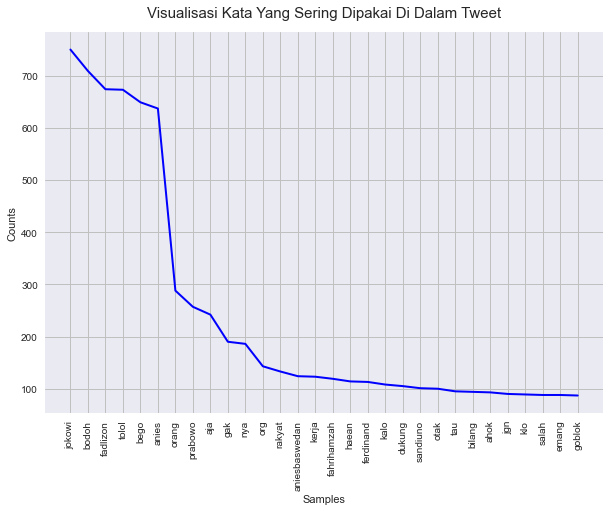

In [37]:
# Membuat visualisasi tweet berdasarkan isi tweet yang sering muncul sebanyak 30 kata yang sering digunakan
from cycler import cycler

plt.figure(figsize=(10, 7))
plt.title("Visualisasi Kata Yang Sering Dipakai Di Dalam Tweet", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["b"])))
fqdist_content.plot(30, cumulative=False)
plt.show()

## 4. Visualisasi Dengan Wordclouds

### Semua Label (Positif & Negatif)

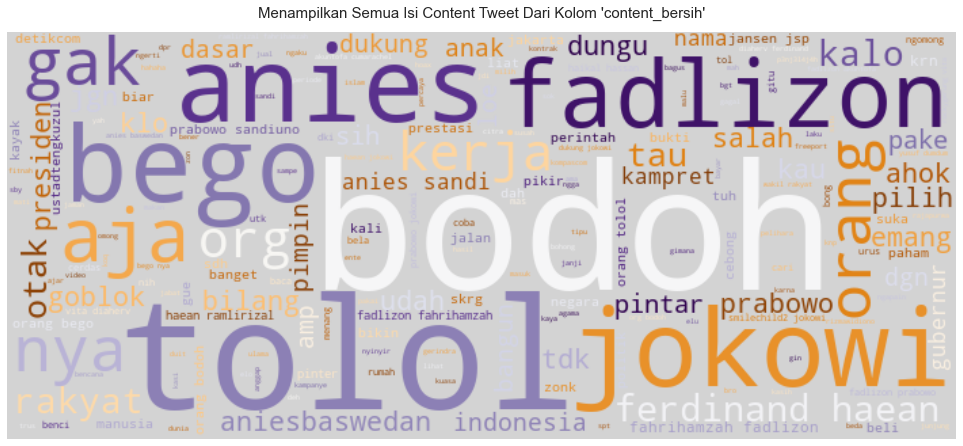

In [21]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_2016" dari kolom "content_bersih"  
all_tweet_post = " ".join(word for word in data_2018["content_bersih"])
wordcloud = WordCloud(colormap="PuOr", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_post)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Tweet Dari Kolom 'content_bersih'", fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Jika dilihat dari visualisasi diatas tampilan tersebut merupakan visualisasi dari wordcloud yang bertujuan untuk mendapatkan insight pemahaman secara utuh tentang suatu ide atau gagasan dari seseorang atau tulisan seseorang dalam suatu waktu tertentu. Visualsasi ini banyak sekali digunakan dalam pengujian analisa sentimen karena untuk melihat setiap kata-kata yang telah diketikkan oleh masyarakat.

Namun tampilan visualisasi diatas masih mencakup semua label (positif & negatif) yang membuat kita kesulitan untuk mengetahui kata-kata mana yang bernilai positif/negatif. Maka dari itu kami akan membuatnya secara terpisah antara visualisasi wordcloud yang bernilai positif dan wordcloud yang bernilai negatif.

### Label Positif

In [22]:
# Memisahkan semua data yang memiliki label positif yang disesuaikan dari kolom "label"
data_2018_label_positif = data_2018[data_2018.label == "positif"]
data_2018_label_positif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan ini bentuk pertan...,positif,"[haikal, hassan, aniesbaswedan, ini, bentuk, p...","[haikal, hassan, aniesbaswedan, bentuk, bego, ...","[haikal, hassan, aniesbaswedan, bentuk, bego, ...",haikal hassan aniesbaswedan bentuk bego alias ...
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo itu haikal ngerti apa b...,positif,"[yunartowijaya, prabowo, itu, haikal, ngerti, ...","[yunartowijaya, prabowo, haikal, ngerti, bego,...","[yunartowijaya, prabowo, haikal, ngerti, bego,...",yunartowijaya prabowo haikal ngerti bego sih b...
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif,"[agvysuhaimi, rullyjoo27, harypriyono88, herri...","[agvysuhaimi, rullyjoo27, harypriyono88, herri...","[agvysuhaimi, rullyjoo27, harypriyono88, herri...",agvysuhaimi rullyjoo27 harypriyono88 herriabdu...
5,2018-12-21 07:31:05+00:00,mmahalik2 effendy seven msh mendingan tuh pak...,positif,"[mmahalik2, effendy, seven, msh, mendingan, tu...","[mmahalik2, effendy, seven, msh, mendingan, tu...","[mmahalik2, effendy, seven, msh, mending, tuh,...",mmahalik2 effendy seven msh mending tuh anies ...
6,2018-12-21 03:04:17+00:00,anies berkata trik jkt bisa menangin prabowo p...,positif,"[anies, berkata, trik, jkt, bisa, menangin, pr...","[anies, trik, jkt, menangin, prabowo, pilpres,...","[anies, trik, jkt, menangin, prabowo, pilpres,...",anies trik jkt menangin prabowo pilpres bego m...


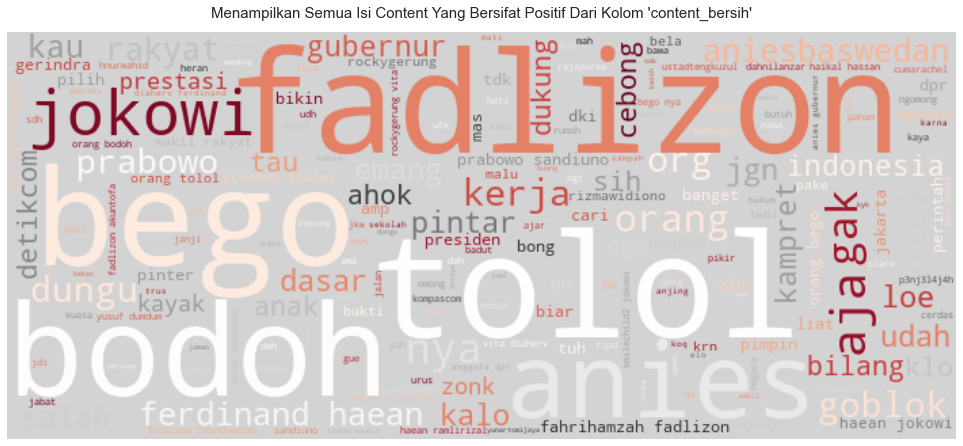

In [23]:
# Memvisualisasikan menggunakan wordcloud dari DataFrame "data_2016_label_positif" dari kolom "content_bersih"  
all_content_positive = " ".join(word for word in data_2018_label_positif["content_bersih"])
wordcloud = WordCloud(colormap="RdGy", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_positive)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Yang Bersifat Positif Dari Kolom 'content_bersih'", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Label Negatif

In [24]:
# Memisahkan semua data yang memiliki label negatif yang disesuaikan dari kolom "label"
data_2018_label_negatif = data_2018[data_2018.label == "negatif"]
data_2018_label_negatif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan nonayen...,negatif,"[ariantobulolo, salima252, aniesbaswedan, nona...","[ariantobulolo, salima252, aniesbaswedan, nona...","[ariantobulolo, salima252, aniesbaswedan, nona...",ariantobulolo salima252 aniesbaswedan nonayena...
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif,"[heykamuuuh, kalem, min, bego, mah, admin, sua...","[heykamuuuh, kalem, min, bego, mah, admin, sua...","[heykamuuuh, kalem, min, bego, mah, admin, sua...",heykamuuuh kalem min bego mah admin suara anie...
19,2018-12-01 00:56:42+00:00,kami laporkan budi djarot lalu oknum wanita an...,negatif,"[kami, laporkan, budi, djarot, lalu, oknum, wa...","[laporkan, budi, djarot, oknum, wanita, anggot...","[lapor, budi, djarot, oknum, wanita, anggota, ...",lapor budi djarot oknum wanita anggota gji hin...
28,2018-11-17 01:32:30+00:00,harismz fajarnugros suaraanies bego tambah iy...,negatif,"[harismz, fajarnugros, suaraanies, bego, tamba...","[harismz, fajarnugros, suaraanies, bego, iya, ...","[harismz, fajarnugros, suaraanies, bego, iya, ...",harismz fajarnugros suaraanies bego iya fajarn...
29,2018-11-15 11:49:50+00:00,agentarya lusihq jokowi prabowo sandiuno anie...,negatif,"[agentarya, lusihq, jokowi, prabowo, sandiuno,...","[agentarya, lusihq, jokowi, prabowo, sandiuno,...","[agentarya, lusihq, jokowi, prabowo, sandiuno,...",agentarya lusihq jokowi prabowo sandiuno anies...


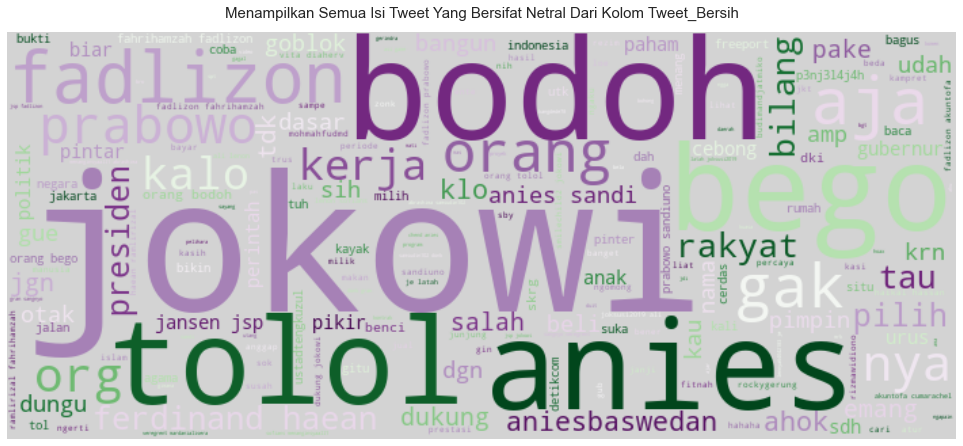

In [25]:
# Membuat Tampilan Visualisasi menggunakan wordcloud dari DataFrame "data_2016_label_negatif" dari kolom "content_bersih" 
all_content_negative = " ".join(word for word in data_2018_label_negatif["content_bersih"])
wordcloud = WordCloud(colormap="PRGn", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_negative)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Netral Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Melakukan Pemodelan Dengan Model Machine Learning

In [26]:
# Menampilkan keseluruhan data dari DataFrame "data_2018"
data_2018.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2018-12-27 13:00:39+00:00,haikal hassan aniesbaswedan ini bentuk pertan...,positif,"[haikal, hassan, aniesbaswedan, ini, bentuk, p...","[haikal, hassan, aniesbaswedan, bentuk, bego, ...","[haikal, hassan, aniesbaswedan, bentuk, bego, ...",haikal hassan aniesbaswedan bentuk bego alias ...
1,2018-12-25 10:01:05+00:00,yunartowijaya prabowo itu haikal ngerti apa b...,positif,"[yunartowijaya, prabowo, itu, haikal, ngerti, ...","[yunartowijaya, prabowo, haikal, ngerti, bego,...","[yunartowijaya, prabowo, haikal, ngerti, bego,...",yunartowijaya prabowo haikal ngerti bego sih b...
2,2018-12-23 07:02:38+00:00,ariantobulolo salima252 aniesbaswedan nonayen...,negatif,"[ariantobulolo, salima252, aniesbaswedan, nona...","[ariantobulolo, salima252, aniesbaswedan, nona...","[ariantobulolo, salima252, aniesbaswedan, nona...",ariantobulolo salima252 aniesbaswedan nonayena...
3,2018-12-22 08:50:26+00:00,heykamuuuh kalem min bego mah admin suara ani...,negatif,"[heykamuuuh, kalem, min, bego, mah, admin, sua...","[heykamuuuh, kalem, min, bego, mah, admin, sua...","[heykamuuuh, kalem, min, bego, mah, admin, sua...",heykamuuuh kalem min bego mah admin suara anie...
4,2018-12-21 15:32:31+00:00,agvysuhaimi rullyjoo27 harypriyono88 herriabd...,positif,"[agvysuhaimi, rullyjoo27, harypriyono88, herri...","[agvysuhaimi, rullyjoo27, harypriyono88, herri...","[agvysuhaimi, rullyjoo27, harypriyono88, herri...",agvysuhaimi rullyjoo27 harypriyono88 herriabdu...


Karena pada pengujian kali ini data yang bersifat lebih dominan terhadap data dokumen maka kami akan menggunakan sebuah pembobotan nilai yang bernama TF-IDF (term frequency-inverse document frequency). Pembobotan dengan TF-IDF merupakan salah satu faktor pembobotan yang sering digunakan dalam konteks penambangan data yang bersifat full text. Selain itu TF-IDF juga dapat dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Teknik ini akan melakukan perhitungan dari sebuah kata kunci terhadap masing-masing dokumen.

In [27]:
# Melakukan proses pembobotan nilai dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_2018_tfidf = tfidf.fit_transform(data_2018["content_bersih"].astype("U"))
data_2018_tfidf

<1798x7118 sparse matrix of type '<class 'numpy.float64'>'
	with 28600 stored elements in Compressed Sparse Row format>

In [28]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_2018_tfidf, data_2018["label"], test_size=0.2, random_state=20)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split:

1. data_2018_tfidf: merupakan sebuah fungsi yang berisi nilai pembobotan dari kolom "content_bersih"
2. data_2018: merupakan sebuah fungsi untuk mendeklarasikan/memanggil kolom "label" dari masing-masing nilai sentimen
3. test_size: Nilai presentase dari sebuah ukuran untuk membagi data test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak (random).

Setelah melakukan proses split yaitu membagi keutuhan data menjadi 2 bagian (data test & data train) langkah selanjutnya adalah melakukan pemodelan dengan menggunakan model multinomial naive bayes atau yang biasa dikenal sebagai MultinomialNB. Multinomial naive bayes merupakan sebuah teknik turunan dari naive bayes yang menggunakan teknik yang bernama conditional probability yaitu sebuah teknik yang dapat dilakukan dengan menggunakan frekuensi kemunculan suatu kata pada suatu kelas.

In [29]:
# Pemanggilan model Multinomial Naive Bayes (MultinomialNB) beserta parameternya
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_train = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb_train = GridSearchCV(model_mnb_train, parameters, cv=25) # CV = Cross Validation

grid_search_mnb_train.fit(x_train, y_train)

GridSearchCV(cv=25, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

Penjelasan dari poin-poin yang ada di codingan diatas:
1. Parameters merupakan sebuah teknik pemanggilan fungsi-fungsi yang menjadi bagian dari sebuah model itu sendiri. Untuk mengecek parameter dari setiap model bisa dicek pada website sckit-learn. Pada codingan diatas, fungsi alpha dan fit_prior merupakan bagian dari parameter MultinomialNB. 
2. GridSearchCV merupakan sebuah teknik untuk mencari best paramater/parameter terbaik untuk kasus klasifikasi. Pada codingan diatas, teknik GridSearchCV saya gunakan untuk memanggil variabel model dari MultinomialNB (model_mnb), fungsi serta nilai dari paramater model MultinomialNB, dan fungsi cross validation yang bernilai 30.
3. Cross Validation merupakan sebuah metode yang biasa dipakai dalam pengujian data mining yang bertujuan untuk memperoleh hasil akhir yang optimal. Metode ini akan menilai dengan cara mengestimasi rotasi yang hasil statistik analisisnya akan menggeneralisasi kumpulan data yang bersifat independen.
4. .fit merupakan sebuah fungsi yang bertujuan untuk melatih model dengan data training.

Namun setelah melakukan proses pemodelan untuk data train, saya juga akan melakukan pemodelan untuk data latih (test) supaya hasil akurasi yang di dapatkan tidak mengalami overfitting.

In [30]:
"""
Karena pada langkah sebelumnya sudah melakukan pemanggilan model Multinomial Naive Bayes terhadap data train (latih) selanjutnya
adalah melakukan pemanggilan model Multinomial Naive Bayes untuk data latih
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_test = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
}

grid_search_mnb_test = GridSearchCV(model_mnb_test, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_test.fit(x_test, y_test) # Melatih model MultinomialNB dengan data test supaya tidak terjadi imbalanced

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

In [31]:
# Melakukan pengujian untuk variabel test & varibael train
print("------------------------Prediksi Dari Data Uji---------------------------------")
prediction_test = grid_search_mnb_train.predict(x_test)
print(prediction_test)

print()

print("----------------------Prediksi Dari Data Latih---------------------------------")
prediction_train = grid_search_mnb_test.predict(x_train)
print(prediction_train)

------------------------Prediksi Dari Data Uji---------------------------------
['positif' 'positif' 'positif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'positif' 'positif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'positif' 'negatif' 'positif' 'positif'
 'negatif' 'negatif' 'positif' 'positif' 'negatif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'negatif' 'negatif'
 'positif' 'negatif' 'negatif' 'negatif' 'negatif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'negatif' 'negatif' 'positif' 'positif'
 'positif' 'negatif' 'negatif' 'negatif' 'positif' 'positif' 'negatif'
 'negatif' 'negatif' 'negatif' 'positif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'positif' 'negatif' 'positif' 'negatif' 'negatif'
 'positif' 'negatif' 'positif' 'negatif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'negatif' 'negati

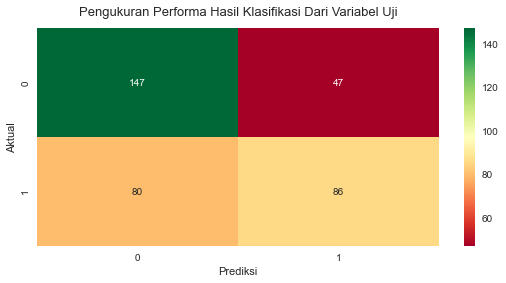

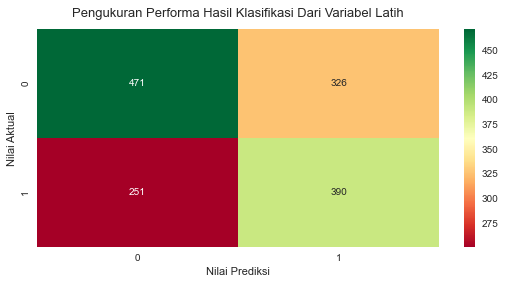

In [32]:
# Membuat visualisasi untuk menampilkan pengukuran performa dari hasil prediksi pada variabel uji & latih

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="RdYlGn", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Uji", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="RdYlGn", fmt=".0f", ax=ax)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Latih", fontdict={"fontsize":13}, pad=13)
plt.show()

Penjelasan dari visualisasi pada confusion matrix:
- Data Test
1. True Positive pada data test memiliki nilai sejumlah 147. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data test memiliki nilai sejumlah 86. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data test memiliki nilai sejumlah 47. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data test memiliki nilai sejumlah 80. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

- Data Train
1. True Positive pada data train memiliki nilai sejumlah 471. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data train memiliki nilai sejumlah 390. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data train memiliki nilai sejumlah 326. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data train memiliki nilai sejumlah 251. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

In [33]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Multonimial Naive Bayes

print("------------------------Prediksi Dari Variabel Uji-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediksi Dari Variabel Latih-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediksi Dari Variabel Uji-------------------------------
              precision    recall  f1-score   support

     negatif       0.65      0.76      0.70       194
     positif       0.65      0.52      0.58       166

    accuracy                           0.65       360
   macro avg       0.65      0.64      0.64       360
weighted avg       0.65      0.65      0.64       360

------------------------Prediksi Dari Variabel Latih-------------------------------
              precision    recall  f1-score   support

     negatif       0.65      0.59      0.62       797
     positif       0.54      0.61      0.57       641

    accuracy                           0.60      1438
   macro avg       0.60      0.60      0.60      1438
weighted avg       0.60      0.60      0.60      1438



## 6. Membuat Prediksi Akhir & Visualisasi Tahap Akhir 

In [34]:
# Membuat variabel baru yang dihasilkan dari hasil prediksi sentimen pada data test
content_output_test = pd.DataFrame({"label": prediction_test})
content_output_test.head()

,label
0,positif
1,positif
2,positif
3,negatif
4,negatif


In [35]:
# Membuat variabel yang dihasilkan dari prediksi label sentimen pada data train
content_output_train = pd.DataFrame({"label": prediction_train})
content_output_train.head()

,label
0,positif
1,positif
2,negatif
3,positif
4,negatif


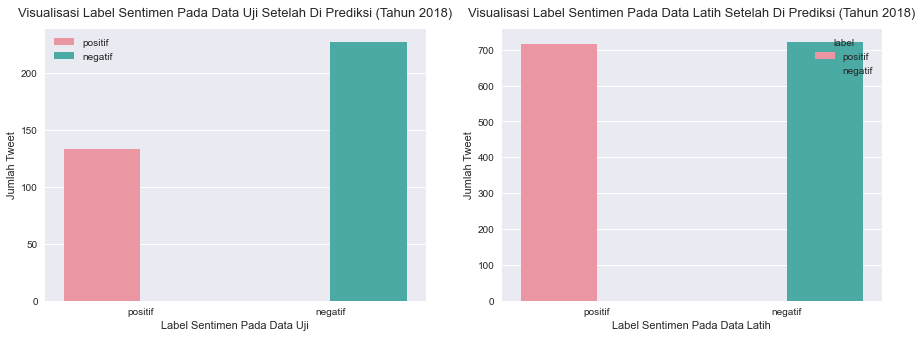

In [36]:
# Visualisasi untuk melihat sekaligus membandingkan hasil sentimen dari data test & data train
plt.figure(figsize=(15, 5))

# Visualiasi dari hasil prediksi pada variabel test/uji
plt.subplot(1, 2, 1)
sns.countplot(x="label", hue="label", data=content_output_test)
plt.title("Visualisasi Label Sentimen Pada Data Uji Setelah Di Prediksi (Tahun 2018)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Uji")
plt.ylabel("Jumlah Tweet")
plt.legend()

# Visualiasi dari hasil prediksi pada variabel train/latih
plt.subplot(1, 2, 2)
sns.countplot(x="label", hue="label", data=content_output_train)
plt.title("Visualisasi Label Sentimen Pada Data Latih Setelah Di Prediksi (Tahun 2018)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Latih")
plt.ylabel("Jumlah Tweet")
plt.show()